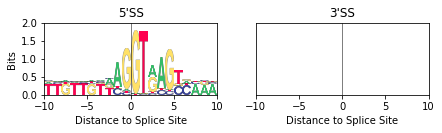

{'5': ['GGACGGCACGGTGAGTGCTG', 'TGGGAACGCTGTGAGTGTCC', 'CACCACCAAGGTGAGGCTGG', 'GGTTTCCTAAGTAAGTGTCT', 'GGATGATGAGGTATGTGTGA', 'CTCTTGGACGGTGAGCAGGA', 'CTCTGGGAAGGTGGGCCAGG', 'TTCCTGCCAGGTGAGTGCTC', 'GTCCATAATGGTAGGTGTTT', 'GAAGGTGACGGTGAGTAGTC', 'ATAGCCAAAGGTGAGCTCAT', 'GGCAGTGAAGGTGAGTTTCA', 'TTCTCCGCAGGTAAGCTCCG', 'AGGAGGAGAGGTGAGCCACT', 'ATGAGCAAAGGTAAGAAGGG', 'GCATGAAAAGGTAAGTTACA', 'GCCTACGGCAATATCCTTAC', 'GACAGCTTGGGTGAGCGCAC', 'TGACATCTGGGTAAGAAATG', 'CAGCCAGGCCGTAAGTGTCC', 'CCCAGCCAAGGTAAACTGTT', 'CTTTTTCCAAGTAAGTTGAA', 'ACAAGAGCAGGTGAGTGGCG', 'ACTGGAATCTGTAAGTAGAT', 'CGTGTATAAGGTGTAGCCTA', 'TGTTTGTCAGGTACTCACTC', 'ACTTCAGCCGGTGAGTGCTG', 'AGAAAGACAGGTATCAGTAT', 'CAGCAATGATGTAAGTATTA', 'GGATTTAAAGGTATGTCTGT', 'TCGTGACAAGGTGAGATTCT', 'CATCTGCTTGGTGAGTGATT', 'ACTATTATAGGTAATTATCT', 'AGGAAACAAGGTACAGCCCA', 'TAACATGCAGGTGAGTGCTC', 'TAGATAAAATGTAAGAAAAT', 'GCTCATCATGGTAGGATGTT', 'AATAGCCAAGGTAATTTTCT', 'GGTGGAGAAGGTAATCTGTG', 'GTGTCCAAAGGTGAGCAAAG', 'TGTATGTAAGGTAAGCTATT', 'CTGGATGC

In [5]:
import matplotlib.pyplot as plt
import matplotlib.patches as mplpatches
import numpy as np
from numpy.core import records
from numpy.core.function_base import linspace
from numpy.core.numeric import identity
from numpy.core.numerictypes import ScalarType
from numpy.lib.function_base import median
import scipy as sp
from matplotlib import figure, style
import argparse
import math
import sys
import random 
import matplotlib.image as mpimg


######################################################## Command Line
# parser = argparse.ArgumentParser()
# parser.add_argument('-i', '--input_file')
# parser.add_argument('-p', '--pngs', default= 'bases/') #!!!!!!! CHNAGE DEFAULT
# parser.add_argument('-s', '--style_sheet', default='BME163')
# parser.add_argument('-o', '--output_file')
# args = parser.parse_args()
# input_file = args.input_file
# pngs = args.pngs
# plt.style.use(args.style_sheet)
######################################################

###################################################### Data Parse
inFile=open('Splice_Sequences.fasta','r')
# inFile = open(input_file,'r')

splice_dict = {'5':[], '3':[]}

for line in inFile:
    line = line.rstrip()
    
    if line[0] == '>':
        prime = line[1]
    
    else:
        seq = line
        splice_dict[prime].append(seq)


base_dict = {'A':'bases/'+'A_small.png', 'G':'bases/'+'G_small.png', 'C':'bases/'+'C_small.png', 'T':'bases/'+'T_small.png'}

img_A = mpimg.imread(base_dict['A'])
img_T = mpimg.imread(base_dict['T'])
img_G = mpimg.imread(base_dict['G'])
img_C = mpimg.imread(base_dict['C'])

base_dict_names = {'A': img_A, 'G': img_G, 'C': img_C, 'T': img_T}

###################################################### Figure set-up
figureHeight=3
figureWidth=6
plt.figure(figsize=(figureWidth,figureHeight))

left_panelWidth= 2.4
left_panelHeight= 1
l_relativePanelWidth=left_panelWidth/figureWidth
l_relativePanelHeight=left_panelHeight/figureHeight

right_panelWidth= 2.4
right_panelHeight= 1
r_relativePanelWidth=right_panelWidth/figureWidth
r_relativePanelHeight=right_panelHeight/figureHeight

left_panel=plt.axes([1/12,7/42,l_relativePanelWidth,l_relativePanelHeight])
right_panel=plt.axes([55/96,7/42,r_relativePanelWidth,r_relativePanelHeight])

######################################################

'''
sys.stdout = open("test.txt", "w")
print(five_prime_seq)
sys.stdout. close()

'''

###################################################### left panel

left_panel.axvline(x=0, c = 'k', lw = .5, alpha = 1)

i = 0
prev_h = 0
height_list = []
for i in range(0,20):

    five_prime_seq = ''
    for items in splice_dict['5']:
        five_prime_seq += items[i]

    for letters in ['A', 'T', 'G', 'C']:

        f_b= five_prime_seq.count(letters)/ len(five_prime_seq)
        H_i = -(f_b * math.log2(f_b))
        e_n = (1/math.log(2)) * (3/(2*20))
        R_i = math.log2(4)-(H_i+ e_n)
        height = (f_b) * R_i
        height_list.append((letters,height))

    for heights in sorted(height_list,key = lambda x:x[1]):
        left_panel.imshow(base_dict_names[heights[0]], aspect = 'auto', origin = 'upper', extent = [i-10, 1+(i-10) , 0+prev_h ,heights[1]])
        prev_h = heights[1]

    prev_h = 0
    height_list = []
        

l_yticks = np.linspace(0,2,5)
left_panel.set_yticks(l_yticks)
left_panel.set_ylabel('Bits')

l_xticks = np.linspace(-10,10,5)
left_panel.set_xticks(l_xticks)
left_panel.set_xlabel('Distance to Splice Site')
left_panel.set_title("5'SS")

left_panel.tick_params(bottom=True, labelbottom=True,
                   left=True, labelleft=True,
                   right=False, labelright=False,
                   top=False, labeltop=False)


left_panel.set_ylim(0,2)

###################################################### right panel


















r_yticks = np.linspace(0,2,5)
right_panel.set_yticks(r_yticks)

r_xticks = np.linspace(-10,10,5)
right_panel.set_xticks(r_xticks)
right_panel.set_xlabel('Distance to Splice Site')
right_panel.set_title("3'SS")

right_panel.tick_params(bottom=True, labelbottom=True,
                   left=False, labelleft=False,
                   right=False, labelright=False,
                   top=False, labeltop=False)

right_panel.axvline(x=0, c = 'k', lw = .5, alpha = 1)

right_panel.set_ylim(0,2)
######################################################
#plt.savefig(args.output_file, dpi=600) 
# plt.savefig('Desktop/Koirala_Aahwan_Assignment_Week5.png',dpi=600)
plt.show()
print(splice_dict)